In [1]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [17]:
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 6, 1)

df = web.DataReader('^N225', 'yahoo', start, end)

In [20]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-04,29323.789062,28954.560547,29098.410156,29301.789062,66000000,29301.789062
2022-01-05,29388.160156,29204.449219,29288.800781,29332.160156,78600000,29332.160156
2022-01-06,29158.949219,28487.869141,29136.750000,28487.869141,71600000,28487.869141
2022-01-07,28813.089844,28293.699219,28711.529297,28478.560547,75200000,28478.560547
2022-01-11,28473.470703,28089.490234,28380.900391,28222.480469,73700000,28222.480469
...,...,...,...,...,...,...
2022-05-26,26898.750000,26597.970703,26685.019531,26604.839844,64500000,26604.839844
2022-05-27,26996.699219,26731.599609,26947.800781,26781.679688,69300000,26781.679688
2022-05-30,27401.240234,27057.199219,27092.820312,27369.429688,97000000,27369.429688


In [21]:
df_daily = df.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]
df_daily.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-04,29098.410156,29323.789062,28954.560547,29301.789062,66000000
2022-01-05,29288.800781,29388.160156,29204.449219,29332.160156,78600000
2022-01-06,29136.750000,29158.949219,28487.869141,28487.869141,71600000
2022-01-07,28711.529297,28813.089844,28293.699219,28478.560547,75200000
2022-01-11,28380.900391,28473.470703,28089.490234,28222.480469,73700000
2022-01-12,28449.529297,28814.310547,28427.599609,28765.660156,72500000
2022-01-13,28658.220703,28660.449219,28444.960938,28489.130859,69900000
2022-01-14,28246.990234,28252.960938,27889.210938,28124.279297,82100000
2022-01-17,28332.720703,28449.990234,28274.179688,28333.519531,54500000


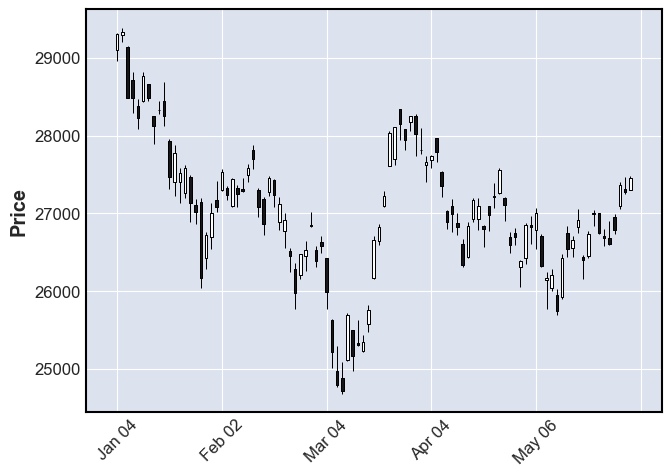

In [22]:
import mplfinance as mpf
mpf.plot(df_daily, type='candle')

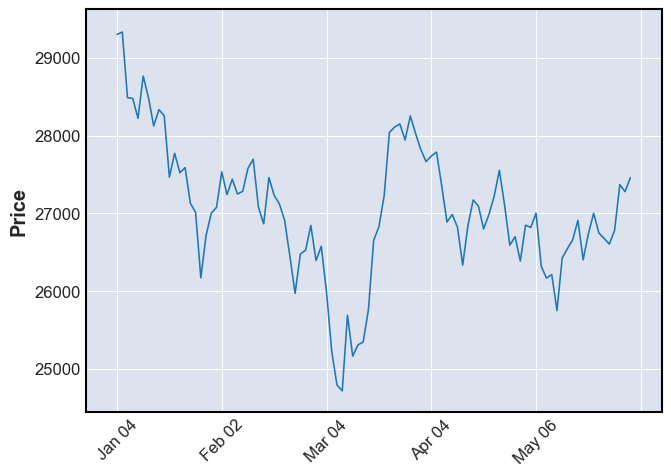

In [23]:
mpf.plot(df_daily, type='line')

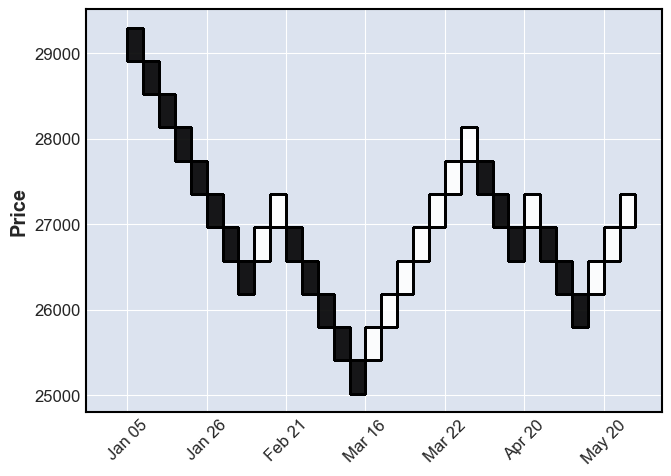

In [24]:
mpf.plot(df_daily, type='renko')

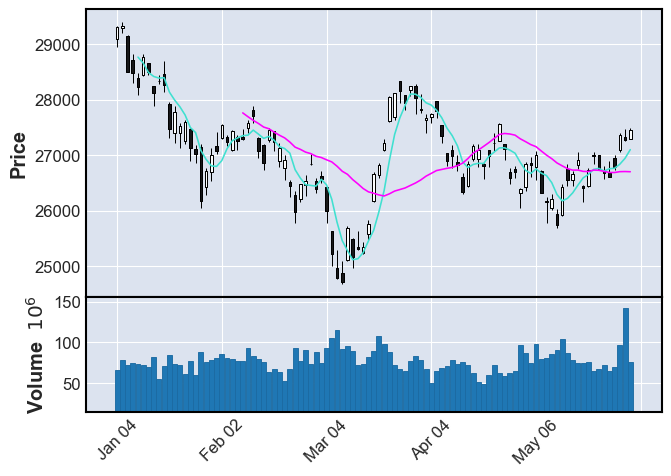

In [27]:
mpf.plot(df_daily, type='candle',volume=True,mav=(5,25))

In [29]:

def macd(df):#売買シグナルを見る
    fastEMA_period = 12 #短期EMAの期間
    slowEMA_period = 26 #長期EMAの期間
    signalSMA_period = 9 #SMAを取る期間
    df['MACD'] = df['Close'].ewm(span=fastEMA_period).mean() - df['Close'].ewm(span=slowEMA_period).mean()
    df['Signal'] = df['MACD'].rolling(signalSMA_period).mean()
    return df

In [31]:
def rsi(df):#売られすぎ買われすぎを判断
    #前日との差分を計算
    df_diff = df['Close'].diff(1)
    
    #計算用のDataFrameを定義
    df_up, df_down = df_diff.copy(), df_diff.copy()
    
    #df_upはマイナス値を0に変換
    #df_downはプラス値を0に変換
    df_up[df_up < 0] = 0
    df_down[df_down > 0] = 0
    df_down = df_down * -1
    
    #期間14でそれぞれの平均を算出
    df_up_sma14 = df_up.rolling(window=14, center=False).mean()
    df_down_sma14 = df_down.rolling(window=14, center=False).mean()
    
    #RSIを算出
    df['RSI'] = 100.0 * (df_up_sma14 / (df_up_sma14 + df_down_sma14))
    return df
    

In [32]:
df_daily = macd(df_daily)
df_daily = rsi(df_daily)

In [33]:
df_daily

,Open,High,Low,Close,Volume,MACD,Signal,RSI
Date,,,,,,,,
2022-01-04,29098.410156,29323.789062,28954.560547,29301.789062,66000000,0.000000,NaN,NaN
2022-01-05,29288.800781,29388.160156,29204.449219,29332.160156,78600000,0.681403,NaN,NaN
2022-01-06,29136.750000,29158.949219,28487.869141,28487.869141,71600000,-25.313172,NaN,NaN
2022-01-07,28711.529297,28813.089844,28293.699219,28478.560547,75200000,-36.851735,NaN,NaN
2022-01-11,28380.900391,28473.470703,28089.490234,28222.480469,73700000,-52.535812,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-26,26685.019531,26898.750000,26597.970703,26604.839844,64500000,-50.418129,-107.231065,45.033522
2022-05-27,26947.800781,26996.699219,26731.599609,26781.679688,69300000,-36.664170,-89.069202,56.592164
2022-05-30,27092.820312,27401.240234,27057.199219,27369.429688,97000000,21.390612,-67.538161,65.249295


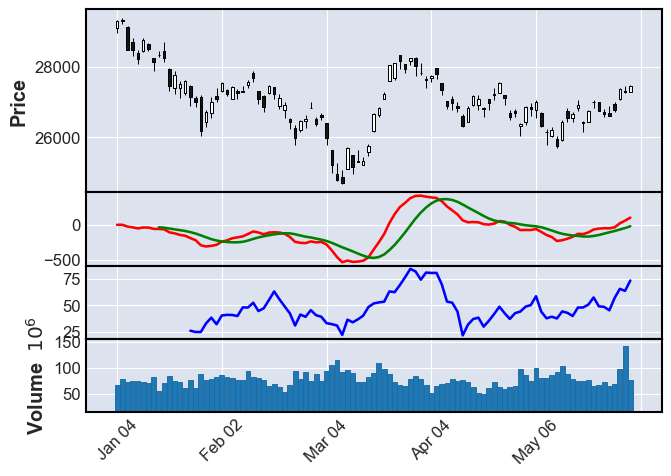

In [38]:
add_plot = [
    mpf.make_addplot(df_daily['MACD'], color='r',panel=1,secondary_y=False),
    mpf.make_addplot(df_daily['Signal'], color='g',panel=1,secondary_y=False),
    mpf.make_addplot(df_daily['RSI'], color='b',panel=2,secondary_y=False)
]

mpf.plot(df_daily, type='candle',addplot=add_plot, volume_panel=3, volume=True)